## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""


In [2]:
import os
import keras

# 請嘗試設定 GPU：os.environ


Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x):
    max = x.max()
    min = x.min()
    x = (x-min)/(max-min)
    x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes = 10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y  

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [8]:
#建立你的神經網路

def build_mlp(input_shape, output_units=10, num_neurons=[512, 512, 256, 256, 128, 128, 64, 64]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
    
model = build_mlp(input_shape=x_train.shape[1:])    
model.summary()

W0729 22:57:57.197920  2424 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0729 22:57:57.218921  2424 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0729 22:57:57.222921  2424 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 512)               262656    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer4 (Dense)        (None, 256)               65792     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer6 (Dense)        (None, 128)               16512     
__________

In [9]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [10]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0729 22:58:06.352443  2424 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0729 22:58:06.362444  2424 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [11]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0729 22:58:08.786582  2424 deprecation.py:323] From C:\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0729 22:58:08.928591  2424 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 14s 278us/step - loss: 1.9966 - acc: 0.2548 - val_loss: 1.8571 - val_acc: 0.3193
Epoch 2/100
50000/50000 [==============================] - 14s 273us/step - loss: 1.7762 - acc: 0.3555 - val_loss: 1.7020 - val_acc: 0.3799
Epoch 3/100
50000/50000 [==============================] - 14s 271us/step - loss: 1.6759 - acc: 0.3933 - val_loss: 1.6188 - val_acc: 0.4159
Epoch 4/100
50000/50000 [==============================] - 15s 300us/step - loss: 1.6060 - acc: 0.4220 - val_loss: 1.5981 - val_acc: 0.4309
Epoch 5/100
50000/50000 [==============================] - 14s 273us/step - loss: 1.5420 - acc: 0.4454 - val_loss: 1.5755 - val_acc: 0.4313
Epoch 6/100
50000/50000 [==============================] - 13s 252us/step - loss: 1.4982 - acc: 0.4646 - val_loss: 1.5711 - val_acc: 0.4398
Epoch 7/100
50000/50000 [==============================] - 12s 242us/step - loss: 1.4724 - acc: 0.4713 - val_l

Epoch 59/100
50000/50000 [==============================] - 12s 241us/step - loss: 0.3150 - acc: 0.8901 - val_loss: 2.7626 - val_acc: 0.4905
Epoch 60/100
50000/50000 [==============================] - 12s 241us/step - loss: 0.2961 - acc: 0.8953 - val_loss: 2.8961 - val_acc: 0.4960
Epoch 61/100
50000/50000 [==============================] - 13s 270us/step - loss: 0.3079 - acc: 0.8918 - val_loss: 2.7901 - val_acc: 0.4971
Epoch 62/100
50000/50000 [==============================] - 15s 293us/step - loss: 0.2875 - acc: 0.8993 - val_loss: 2.8861 - val_acc: 0.4965
Epoch 63/100
50000/50000 [==============================] - 13s 255us/step - loss: 0.2850 - acc: 0.8986 - val_loss: 2.9397 - val_acc: 0.4910
Epoch 64/100
50000/50000 [==============================] - 13s 267us/step - loss: 0.2726 - acc: 0.9052 - val_loss: 2.8539 - val_acc: 0.4981
Epoch 65/100
50000/50000 [==============================] - 12s 245us/step - loss: 0.2806 - acc: 0.9033 - val_loss: 2.7768 - val_acc: 0.4976
Epoch 66/100


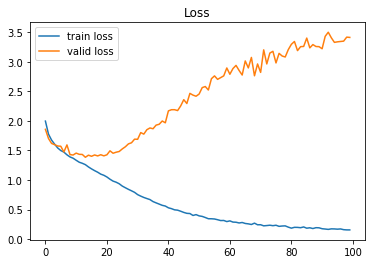

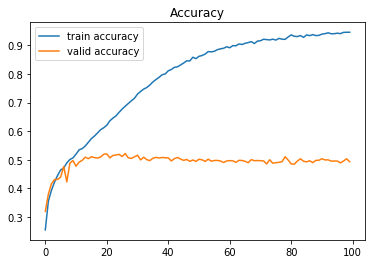

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()